# Setup

- Download Spark 2.2, unpack to /opt/spark (or anywhere)
- Set SPARK_HOME var to /opt/spark (or where it was unpacked to)
- Download BigDL 0.7, unpack anywhere
- Set BIGDL_HOME var to unpacked BigDL directory
- do `pip install bigdl==0.7` somewhere
- download https://gist.github.com/lukovnikov/461d1165ea04317d2be6b66995ffa73c
- start jupyter using the script (must be marked as executable)

### Import things: pyspark, matplotlib, bigdl, initialize engine, check version

In [5]:
import pyspark
from pyspark import SparkContext
import numpy as np
import re
import matplotlib as mpl

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]

from bigdl.util.common import *
from bigdl.nn.layer import *
from bigdl.nn.criterion import *
from bigdl.optim.optimizer import *
from bigdl.util.common import Sample
from bigdl.dataset.transformer import *

In [3]:
init_engine()

In [4]:
pyspark.__version__

'2.2.3'

# Linear regression

## Create random data:
- create a dataset of 100 random datapoints such that $y = a * x + b$, where $a$ and $b$ are some chosen coefficients
     - (tip: `np.random.random`)
- add some noise to the output $y$ to create $\hat{y}$.
     - (tip: `np.random.normal`)
- plot $y$ and $\hat{y}$ 
     - (tip: `plt.scatter`)
- create a dataset of 50 random datapoints $x_{test}$

In [16]:
NUMDATA = 100
NOISE = 0.3
INDIM=1
all_x = np.random.random((NUMDATA, 1))
def data_f(_x, a=2, b=7, noise=NOISE):
    ret = _x * a + b
    return ret + np.random.normal(0, +noise/2, (_x.shape)), ret

all_y, true_y = data_f(all_x)
test_x = np.random.random((50, 1))
test_y, true_test_y = data_f(test_x)

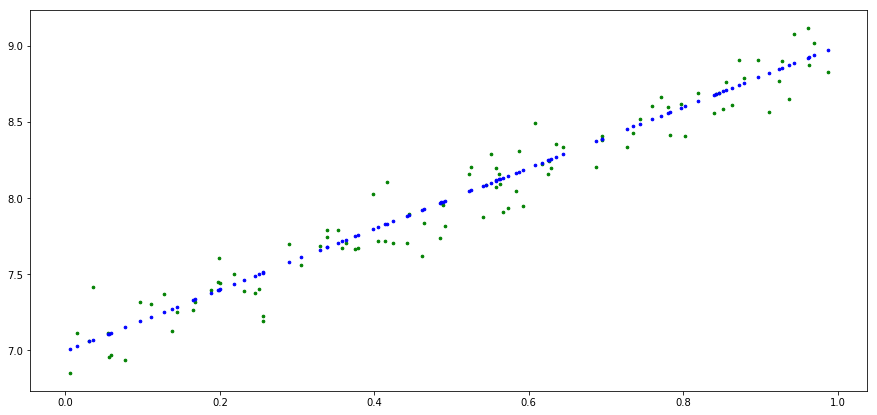

In [17]:
plt.scatter(all_x, all_y, 7, "g")
plt.scatter(all_x, true_y, 7, "b")

### Load data into RDD[Sample]:
(tip: `Sample.from_ndarray`)

In [18]:
train_data_rdd = sc.parallelize(zip(all_x, all_y)).map(lambda x : Sample.from_ndarray(x[0], float(x[1])))
train_data_rdd.take(5)
test_data_rdd = sc.parallelize(zip(test_x, test_y)).map(lambda x: Sample.from_ndarray(x[0], float(x[1])))
test_data_rdd.take(5)

[Sample: features: [JTensor: storage: [0.43588185], shape: [1], float], labels: [JTensor: storage: [7.675162], shape: [1], float],
 Sample: features: [JTensor: storage: [0.10785878], shape: [1], float], labels: [JTensor: storage: [7.1614184], shape: [1], float],
 Sample: features: [JTensor: storage: [0.1331063], shape: [1], float], labels: [JTensor: storage: [7.325616], shape: [1], float],
 Sample: features: [JTensor: storage: [0.10008866], shape: [1], float], labels: [JTensor: storage: [7.332055], shape: [1], float],
 Sample: features: [JTensor: storage: [0.90709627], shape: [1], float], labels: [JTensor: storage: [8.86858], shape: [1], float]]

## Model

TODO: define model:
- single linear layer with one input and one output

In [19]:
model = Linear(1, 1)

creating: createLinear


## Optimizer
TODO: create optimizer, specifying the following optimization parameters:
- model
- training data (tip: training_rdd=)
- loss (MSE)
- SGD with learning rate 0.2
- maximum 15 epochs
- batch size = 4

In [20]:
# Create an Optimizer
optimizer = Optimizer(
    model=model,
    training_rdd=train_data_rdd,
    criterion=MSECriterion(),
    optim_method=SGD(learningrate=0.2),
    end_trigger=MaxEpoch(15),
    batch_size=4)

creating: createMSECriterion
creating: createDefault
creating: createSGD
creating: createMaxEpoch
creating: createDistriOptimizer


TODO: run the optimizer

In [21]:
trained_model = optimizer.optimize()

## Check trained model on training data and test data

TODO:
- evaluate trained model on both the training data and the test data
    - (tip: .predict(rdd))
- plot predictions against original data and true original data (without noise)

In [22]:
train_data_rdd.take(5)

[Sample: features: [JTensor: storage: [0.35335615], shape: [1], float], labels: [JTensor: storage: [7.7918134], shape: [1], float],
 Sample: features: [JTensor: storage: [0.18795305], shape: [1], float], labels: [JTensor: storage: [7.39569], shape: [1], float],
 Sample: features: [JTensor: storage: [0.41418633], shape: [1], float], labels: [JTensor: storage: [7.721541], shape: [1], float],
 Sample: features: [JTensor: storage: [0.61723524], shape: [1], float], labels: [JTensor: storage: [8.227202], shape: [1], float],
 Sample: features: [JTensor: storage: [0.9692975], shape: [1], float], labels: [JTensor: storage: [9.016278], shape: [1], float]]

In [23]:
# Print the first five predicted results of training data.
predict_result = trained_model.predict(train_data_rdd)
p = predict_result.collect()
p = np.concatenate(p)
p_test = trained_model.predict(test_data_rdd).collect()
p_test = np.concatenate(p_test)

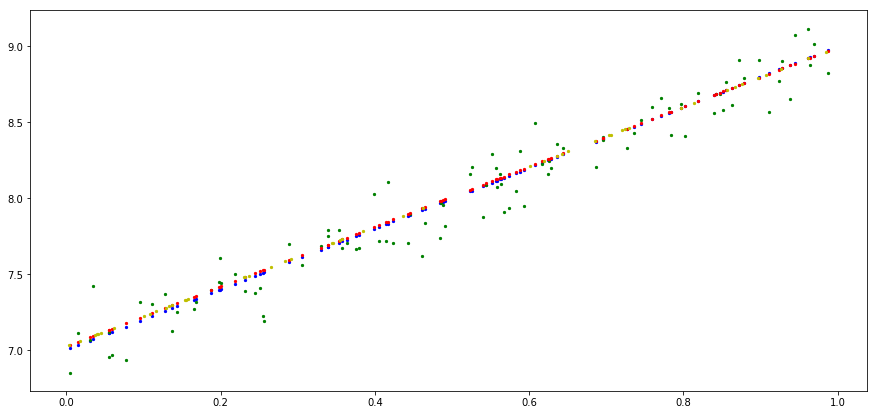

In [24]:
plt.scatter(all_x, true_y, 5, "b")
plt.scatter(all_x, all_y, 5, "g")
plt.scatter(all_x, p, 5, "r")
plt.scatter(test_x, p_test, 5, "y")

TODO: check parameters and compare against the coefficients chosen in data creation

In [25]:
trained_model.parameters()

{'Linearb68ccc8b': {'weight': array([[1.9721705]], dtype=float32),
  'bias': array([7.0247154], dtype=float32),
  'gradBias': array([0.], dtype=float32),
  'gradWeight': array([[0.]], dtype=float32)}}